In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from qutip import *
from qutip.qip.models.optpulseprocessor import OptPulseProcessor

Assume the qubit system have a drift Hamiltonian $H=\hbar \omega \sigma_z$, for simplicity we let $\hbar \omega = 10$

In [2]:
a = destroy(2)
Hadamard = hadamard_transform(1)
ex_state = basis(2,1)
plus_state = (basis(2,1)+basis(2,0)).unit()
tlist = np.linspace(0,2,100)
H_d = 10.*sigmaz()

### $T_1$
The $T_1$ relaxation time describes the strength of amplitude damping and can be described, in a two-level system, by a collapse operator $\frac{1}{\sqrt{T_1}}a$, where $a$ is the annihilation operator. This leads to an exponential decay of the population at the excited state proportional to $\exp({-t/T_1})$. This amplitude damping can be simulated by given specify the attribute `T1` of the processor

In [3]:
T1 = 1.
test = OptPulseProcessor(1, drift=H_d, T1=T1)
result = test.run_state(ex_state, e_ops=[a.dag()*a], tlist = tlist)

Result object with mesolve data.
--------------------------------
expect = True
num_expect = 1, num_collapse = 0


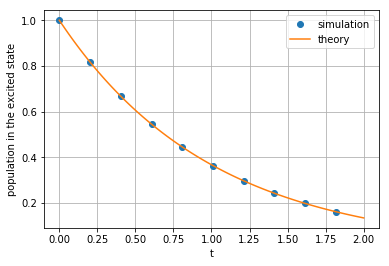

In [4]:
plt.plot(tlist[0:100:10], result.expect[0][0:100:10], 'o', label="simulation")
plt.plot(tlist, np.exp(-1./T1*tlist), label="theory")
plt.xlabel("t")
plt.ylabel("population in the excited state")
plt.legend()
plt.grid()

## $T_2$
The T2 time describes the dephasing process. Here one has to be careful that the amplitude damping channel characterized by $T_1$ will also lead to a dephasing proportional to $\exp(-t/2T_1)$. To make sure that the overall phase dampling is $exp(-t/T_2)$, the processor (internally) uses an collapse operator $\frac{1}{\sqrt{2*T'_2}} \sigma_z$ with $\frac{1}{T'_2}+\frac{1}{2T_1}=\frac{1}{T_2}$ to simulate the dephasing. (This also indicates that $T_2 \leqslant 2T_1$)

Usually, the $T_2$ time is measured by the Ramsey experiment, where the qubit starts from the excited state, undergoes a $\pi/2$ pulse, proceeds for a time $t$, and measured after another $\pi/2$ pulse. For simplicity, here we directly calculate the expectation value of $\rm{H}\circ a^\dagger a \circ\rm{H}$, where $\rm{H}$ denotes the Hadamard transformation. This is equivalent to measure the population of $\frac{1}{\sqrt{2}}(|0\rangle+|1\rangle)$. The envelope should follow an exponential decay characterized by $T_2$.



In [5]:
T1 = 1.
T2 = 0.5
test = OptPulseProcessor(1,  drift=H_d, T1=T1, T2=T2)
result = test.run_state(rho0=plus_state, tlist=tlist, e_ops=[Hadamard*a.dag()*a*Hadamard])

Result object with mesolve data.
--------------------------------
expect = True
num_expect = 1, num_collapse = 0


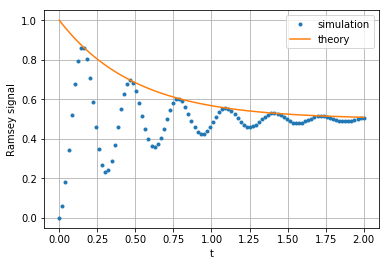

In [6]:
fig, ax = plt.subplots()
ax.plot(tlist, result.expect[0], '.', label="simulation")
ax.plot(tlist, np.exp(-1./T2*tlist)*0.5 + 0.5, label="theory")
plt.xlabel("t")
plt.ylabel("Ramsey signal")
plt.legend()
ax.grid()